In [1]:
import numpy as np
from qiskit import (QuantumCircuit, execute,assemble, Aer)
from qiskit.visualization import (plot_histogram, plot_bloch_multivector)

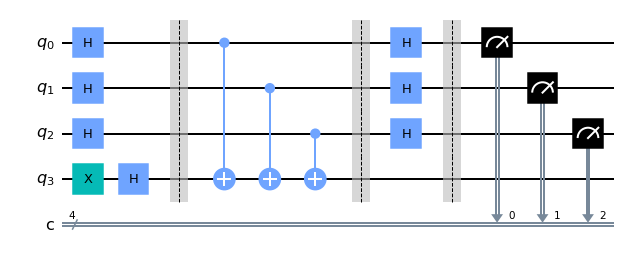

In [2]:
# збалансована
sim = Aer.get_backend('qasm_simulator')
circ = QuantumCircuit(4, 4)

circ.h(0)
circ.h(1)
circ.h(2)
circ.x(3)
circ.h(3)

circ.barrier()

circ.cx(0,3)
circ.cx(1,3)
circ.cx(2,3)

circ.barrier()

circ.h(0)
circ.h(1)
circ.h(2)

circ.barrier()

# circ.measure_all()
circ.measure(range(3),range(3))
circ.draw('mpl')

{'0111': 1024}


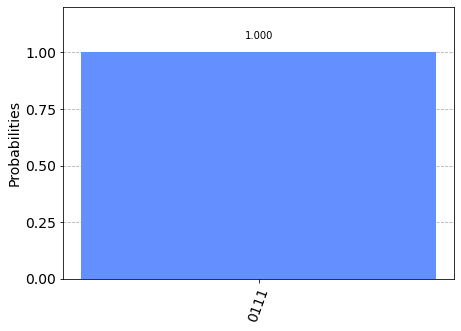

In [3]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, backend=simulator, shots=1024).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

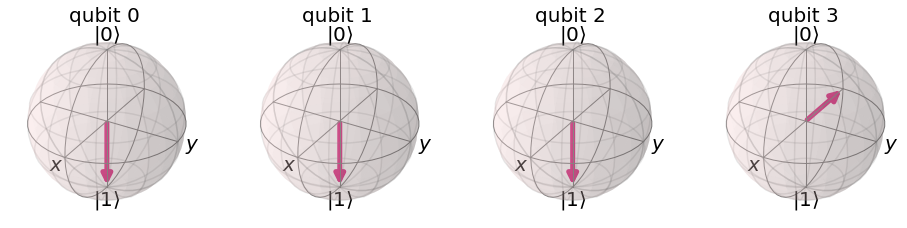

In [4]:
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(circ)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)